'''
【课程2.1】  缺失值处理

数据缺失主要包括记录缺失和字段信息缺失等情况，其对数据分析会有较大影响，导致结果不确定性更加显著

缺失值的处理：删除记录 / 数据插补 / 不处理

'''

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
% matplotlib inline

In [4]:
# 判断是否有缺失值数据 - isnull，notnull
# isnull：缺失值为True，非缺失值为False
# notnull：缺失值为False，非缺失值为True

s = pd.Series([12,33,45,23,np.nan,np.nan,66,54,np.nan,99])
df = pd.DataFrame({'value1':[12,33,45,23,np.nan,np.nan,66,54,np.nan,99,190],
                  'value2':['a','b','c','d','e',np.nan,np.nan,'f','g',np.nan,'g']})

print(s.isnull())              # Series直接判断是否是缺失值，返回一个Series
print(df.notnull())            # Dataframe直接判断是否是缺失值，返回一个Series
print(df['value1'].notnull())  # 通过索引判断
print('------')

s2 = s[s.isnull() == False]    # 筛选非缺失值
df2 = df[df['value1'].notnull()]
print(s2)
print(df2)

0    False
1    False
2    False
3    False
4     True
5     True
6    False
7    False
8     True
9    False
dtype: bool
    value1  value2
0     True    True
1     True    True
2     True    True
3     True    True
4    False    True
5    False   False
6     True   False
7     True    True
8    False    True
9     True   False
10    True    True
0      True
1      True
2      True
3      True
4     False
5     False
6      True
7      True
8     False
9      True
10     True
Name: value1, dtype: bool
------
0    12.0
1    33.0
2    45.0
3    23.0
6    66.0
7    54.0
9    99.0
dtype: float64
    value1 value2
0     12.0      a
1     33.0      b
2     45.0      c
3     23.0      d
6     66.0    NaN
7     54.0      f
9     99.0    NaN
10   190.0      g


In [5]:
# 删除缺失值 - dropna
s = pd.Series([12,33,45,23,np.nan,np.nan,66,54,np.nan,99])
df = pd.DataFrame({'value1':[12,33,45,23,np.nan,np.nan,66,54,np.nan,99,190],
                  'value2':['a','b','c','d','e',np.nan,np.nan,'f','g',np.nan,'g']})

s.dropna(inplace=True)                # drop方法：可直接用于Series，Dataframe
df2 = df['value1'].dropna()
print(s)
print(df2)

0    12.0
1    33.0
2    45.0
3    23.0
6    66.0
7    54.0
9    99.0
dtype: float64
0      12.0
1      33.0
2      45.0
3      23.0
6      66.0
7      54.0
9      99.0
10    190.0
Name: value1, dtype: float64


In [10]:
# 填充/替换缺失数据 - fillna、replace

s = pd.Series([12,33,45,23,np.nan,np.nan,66,54,np.nan,99])                        # 创建数据
df = pd.DataFrame({'value1':[12,33,45,23,np.nan,np.nan,66,54,np.nan,99,190],
                  'value2':['a','b','c','d','e',np.nan,np.nan,'f','g',np.nan,'g']})

s.fillna(0,inplace=True)
print(s)
print('------')
'''
 s.fillna(value=None, method=None, axis=None, inplace=False, limit=None, downcast=None, **kwargs)
 value：填充值
 注意inplace参数
 
'''
df['value1'].fillna(method='pad',inplace=True)
print(df)
print('------')
'''
 method参数：
 pad / ffill → 用之前的数据填充 
 backfill / bfill → 用之后的数据填充 

'''
s = pd.Series([1,1,1,1,2,2,2,3,4,5,np.nan,np.nan,66,54,np.nan,99])
s.replace(np.nan,'缺失数据',inplace=True)
print(s)
print('------')
'''
 df.replace(to_replace=None, value=None, inplace=False, limit=None, regex=False, method='pad', axis=None)
 to_replace → 被替换的值
 value → 替换值

'''
s.replace([1,2,3],np.nan,inplace=True)     # 多值用np.nan代替
print(s)

0    12.0
1    33.0
2    45.0
3    23.0
4     0.0
5     0.0
6    66.0
7    54.0
8     0.0
9    99.0
dtype: float64
------
    value1 value2
0     12.0      a
1     33.0      b
2     45.0      c
3     23.0      d
4     23.0      e
5     23.0    NaN
6     66.0    NaN
7     54.0      f
8     54.0      g
9     99.0    NaN
10   190.0      g
------
0        1
1        1
2        1
3        1
4        2
5        2
6        2
7        3
8        4
9        5
10    缺失数据
11    缺失数据
12      66
13      54
14    缺失数据
15      99
dtype: object
------
0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
8        4
9        5
10    缺失数据
11    缺失数据
12      66
13      54
14    缺失数据
15      99
dtype: object


In [11]:
# 缺失值插补
# 几种思路：均值/中位数/众数插补、临近值插补、插值法
# （1）均值/中位数/众数插补

s = pd.Series([1,2,3,np.nan,3,4,5,5,5,5,np.nan,np.nan,6,6,7,12,2,np.nan,3,4])  # 创建数据
print(s)
print('------')

u = s.mean()                                                                   # 分别求出均值/中位数/众数
me = s.median()
mod = s.mode()
print(f'平均数:{u},中位数:{me}}') 
print('众数为:',mod.tolist())
print('------')

s.fillna(u,inplace=True)                                                        # 用均值填补
print(s)

0      1.0
1      2.0
2      3.0
3      NaN
4      3.0
5      4.0
6      5.0
7      5.0
8      5.0
9      5.0
10     NaN
11     NaN
12     6.0
13     6.0
14     7.0
15    12.0
16     2.0
17     NaN
18     3.0
19     4.0
dtype: float64
------
平均数:4.5625,中位数:4.5,众数:0    5.0
dtype: float64
------


In [12]:
# 缺失值插补
# 几种思路：均值/中位数/众数插补、临近值插补、插值法
# （2）临近值插补

s = pd.Series([1,2,3,np.nan,3,4,5,5,5,5,np.nan,np.nan,6,6,7,12,2,np.nan,3,4])

s.fillna(method='ffill',inplace=True)            # 用前值插补
print(s)

0      1.0
1      2.0
2      3.0
3      3.0
4      3.0
5      4.0
6      5.0
7      5.0
8      5.0
9      5.0
10     5.0
11     5.0
12     6.0
13     6.0
14     7.0
15    12.0
16     2.0
17     2.0
18     3.0
19     4.0
dtype: float64


In [15]:
# 缺失值插补
# 几种思路：均值/中位数/众数插补、临近值插补、插值法
# （3）插值法 —— 拉格朗日插值法

from scipy.interpolate import lagrange
x = [3,6,9]
y = [10,8,4]

print(lagrange(x,y))
print(type(lagrange(x,y)))
'''
 这里的输出值为的是多项式的n个系数
 这里输出3个值，分别为a0,a1,a2
 y = a0 * x**2 + a1 * x + a2 → y = -0.11111111 * x**2 + 0.33333333 * x + 10
'''
print('差值10为:%.2f' %(lagrange(x,y)(10)))

         2
-0.1111 x + 0.3333 x + 10
<class 'numpy.lib.polynomial.poly1d'>
差值10为:2.22


0    28.242938
1     0.738523
2    51.950727
3          NaN
4    22.878091
dtype: float64
总数据量 100
缺失数据量: 9
缺失数据占比: 9.00%
23.742361446929586
86.26772795053148
62.36644744873047
-18.99462890625
161.5859375
-22.4384765625
315.40625
-3764.0
12776.0


D:\Software\anaconda\lib\site-packages\pandas\core\series.py:841: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


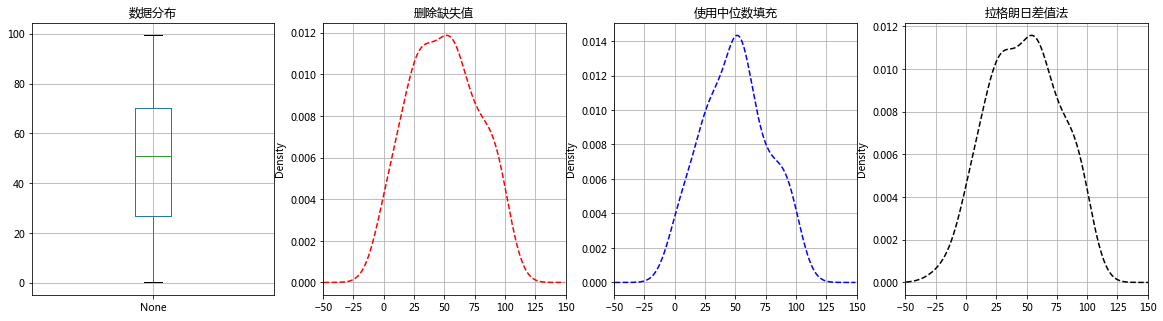

In [23]:
# 缺失值插补
# 几种思路：均值/中位数/众数插补、临近值插补、插值法
# （3）插值法 —— 拉格朗日插值法，实际运用

data = pd.Series(np.random.rand(100)*100)      # 创建数据
data[3,6,33,56,45,66,67,80,90] = np.nan
print(data.head())
print(f'总数据量 {len(data)}')

data_na = data[data.isnull()]                  # 缺失值的数量
print(f'缺失数据量: {len(data_na)}')
print('缺失数据占比: %.2f%%'%( (len(data_na) / len(data) )* 100))

data_c = data.fillna(data.median())            #  中位数填充缺失值


fig,axes = plt.subplots(1,4,figsize = (20,5))
data.plot.box(ax=axes[0],grid=True,title='数据分布')
data.plot(kind='kde',style='--r',ax=axes[1],grid=True,title='删除缺失值',xlim=[-50,150])
data_c.plot(kind='kde',style='--b',ax=axes[2],grid=True,title='使用中位数填充',xlim=[-50,150])

def na_c(s,n,k=5):                            # 创建函数，做插值，由于数据量原因，以空值前后5个数据（共10个数据）为例做插值
    y = s[list(range(n-k,n+k+1))]             # 取数
    y = y[y.notnull()]                        # 删除空值
    return(lagrange(y.index,list(y))(n))

na_re = []
for i in range(len(data)):
    if data.isnull()[i]:
        data[i] = na_c(data,i)
        print(na_c(data,i))
        na_re.append(data[i])

data.dropna(inplace=True)                     # 清除插值后仍存在的缺失值
                                              # 缺失值插值
data.plot(kind='kde',style='--k',ax=axes[3],grid=True,title='拉格朗日差值法',xlim=[-50,150])
